# Dataset processing: take the original calories.csv, filter then split into 3 files for training, testing, and validation

In [69]:
# Load dataset and filter out some columns
# Original:  https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction

import pandas as pd 
# Load dataset
file_path = "calories.csv" 
df = pd.read_csv(file_path)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [71]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


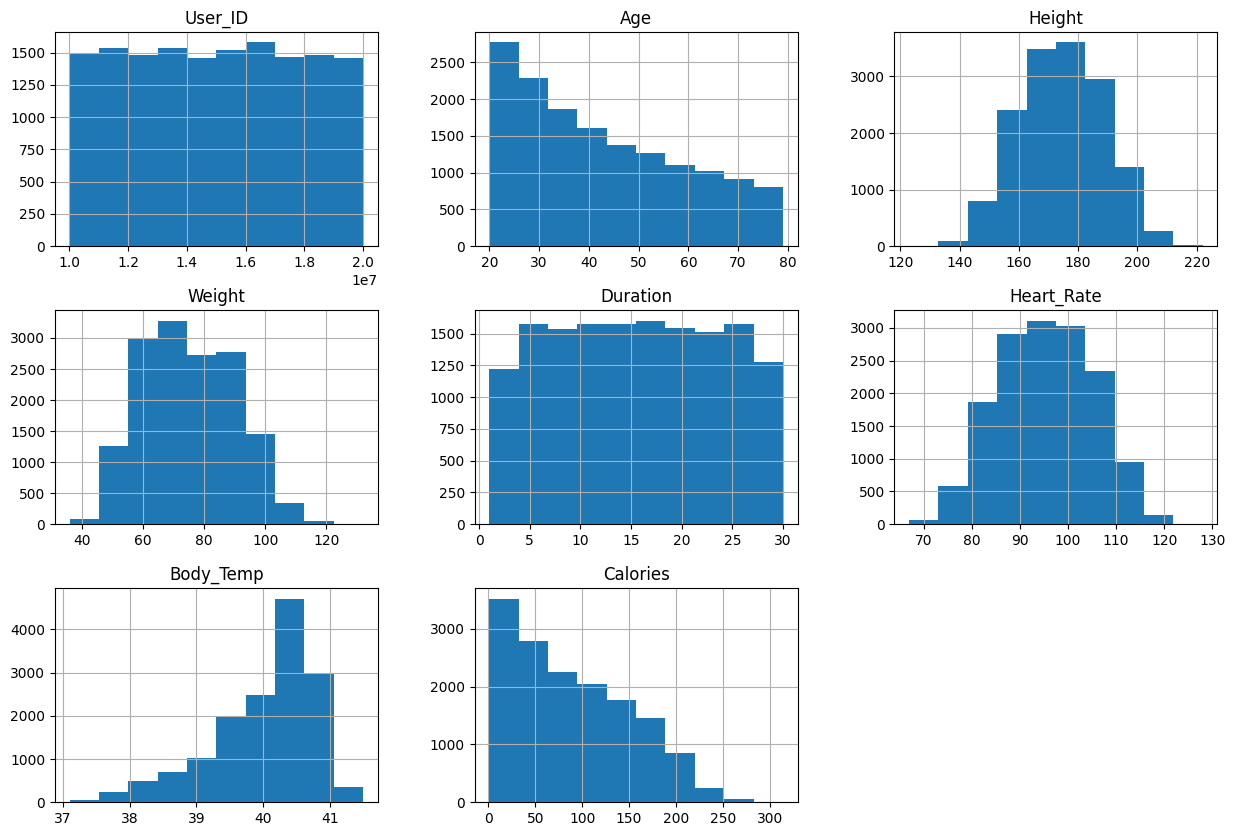

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df.hist(figsize=(15, 10))
plt.show()

In [73]:
df = df.dropna()
df_filtered = df
df_test = df_filtered.sample(n=2000, replace=False)

df_test.to_csv("task1_dataset_eval_t.csv", index=False)
df_test

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
9198,12618012,male,67,185.0,91.0,17.0,97.0,40.4,113.0
10223,19091177,male,34,189.0,87.0,23.0,98.0,40.5,118.0
8016,14793975,female,26,167.0,66.0,20.0,94.0,40.1,95.0
3251,17338539,female,78,175.0,73.0,21.0,107.0,40.6,146.0
12688,16351902,female,50,187.0,81.0,4.0,82.0,39.2,15.0
...,...,...,...,...,...,...,...,...,...
13970,16551300,male,61,178.0,80.0,28.0,111.0,41.0,231.0
4510,19031605,male,41,183.0,83.0,11.0,96.0,39.8,56.0
9669,10044742,female,35,163.0,61.0,27.0,113.0,40.7,189.0
11273,17921022,female,25,165.0,63.0,26.0,113.0,40.8,176.0


In [74]:
# Randomly sample 5000 rows from the dataset and save the result to a new file named dataset_train.csv
# Do not include the samples that are already in other two files
df_filtered_train = df_filtered[~df_filtered["User_ID"].isin(df_test["User_ID"])]
df_train = df_filtered_train.sample(n=9000, replace=False)
df_train.to_csv("dataset_train.csv", index=False)

df_train

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
12570,14498311,male,79,165.0,73.0,13.0,79.0,40.0,54.0
9644,16700865,female,28,148.0,48.0,6.0,91.0,39.4,28.0
4726,17197650,male,27,187.0,82.0,25.0,101.0,40.8,128.0
10013,16400540,male,40,173.0,71.0,16.0,93.0,40.4,69.0
4125,15539631,male,40,183.0,90.0,5.0,80.0,39.0,14.0
...,...,...,...,...,...,...,...,...,...
6306,11236706,male,38,181.0,82.0,21.0,103.0,40.5,125.0
3375,15526188,female,63,172.0,70.0,3.0,85.0,38.6,13.0
2431,13474684,female,30,168.0,70.0,28.0,103.0,41.1,160.0
11872,13764532,female,45,164.0,61.0,5.0,84.0,39.1,20.0


In [76]:
df_filtered_test2 = df_filtered[~df_filtered["User_ID"].isin(df_test["User_ID"])]
print(len(df_filtered_test2))
df_filtered_test2 = df_filtered_test2[~df_filtered_test2["User_ID"].isin(df_train["User_ID"])]
print(len(df_filtered_test2))
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Gender'] == 'male']
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Age'] <= 36]
df_test2 = df_filtered_test2.sample(n=500, replace=False)
print(len(df_test2))

df_test2 = df_test2.drop(columns=["Gender"])

df_test2.to_csv("task2_dataset_eval_t.csv", index=False)
df_test2 = df_test2.drop(columns=["Calories"])
df_test2.to_csv("task2_dataset_eval.csv", index=False)

13000
4000
500


In [77]:
# Load the dataset_eval_with_target.csv and drop the "Price" column and save the result to a new file named dataset_eval.csv
df_eval = pd.read_csv("task1_dataset_eval_t.csv")
df_eval = df_eval.drop(columns=["Calories"])
df_eval.to_csv("task1_dataset_eval.csv", index=False)

df_eval

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,12618012,male,67,185.0,91.0,17.0,97.0,40.4
1,19091177,male,34,189.0,87.0,23.0,98.0,40.5
2,14793975,female,26,167.0,66.0,20.0,94.0,40.1
3,17338539,female,78,175.0,73.0,21.0,107.0,40.6
4,16351902,female,50,187.0,81.0,4.0,82.0,39.2
...,...,...,...,...,...,...,...,...
1995,16551300,male,61,178.0,80.0,28.0,111.0,41.0
1996,19031605,male,41,183.0,83.0,11.0,96.0,39.8
1997,10044742,female,35,163.0,61.0,27.0,113.0,40.7
1998,17921022,female,25,165.0,63.0,26.0,113.0,40.8


## Checking for null rows - don't set traps..

In [78]:
target_datasets = [df_train, df_eval, df_test2]
for dfx in target_datasets:
    missing_rows = dfx[dfx.isna().any(axis=1)]
    assert len(missing_rows) == 0, "The datasets contain NULL tables"

missing_rows.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
